In [2]:
import sys
sys.path.insert(0, "../../python")

from propagation import laser
from ionization import ionization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from scipy import integrate
from numpy.fft import fft, ifft, fft2, ifft2, fftfreq

In [3]:
# Test of a axicon lens
Nx = 2**8
X = 200
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**8
Y = X
y = np.linspace(-Y/2, Y/2, Ny, False)
# z after lens
Nz = 2**8
Z = 400
z = np.linspace(0, Z, Nz)
# Setup t lattice
Nt = 256
T = 150
t = np.linspace(-T/2, T/2, Nt, False)

w0 = 10
alpha = np.radians(10)
tau = 35
f = 0.3
# Gaussian beam
E = np.exp(-(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)
Et = ionization.gaussian_field(1.0, t, f, tau).real

# Axicon lens
E = E * np.exp(-1j*np.pi*alpha*np.sqrt(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2))
# Create each frequency component
e = laser.pulse_prop2(E, Et, x, y, z, t, c=0.3)

Frequency component  1  of  256
Frequency component  2  of  256
Frequency component  3  of  256
Frequency component  4  of  256
Frequency component  5  of  256
Frequency component  6  of  256
Frequency component  7  of  256
Frequency component  8  of  256
Frequency component  9  of  256
Frequency component  10  of  256
Frequency component  11  of  256
Frequency component  12  of  256
Frequency component  13  of  256
Frequency component  14  of  256
Frequency component  15  of  256
Frequency component  16  of  256
Frequency component  17  of  256
Frequency component  18  of  256
Frequency component  19  of  256
Frequency component  20  of  256
Frequency component  21  of  256
Frequency component  22  of  256
Frequency component  23  of  256
Frequency component  24  of  256
Frequency component  25  of  256
Frequency component  26  of  256
Frequency component  27  of  256
Frequency component  28  of  256
Frequency component  29  of  256
Frequency component  30  of  256
Frequency component

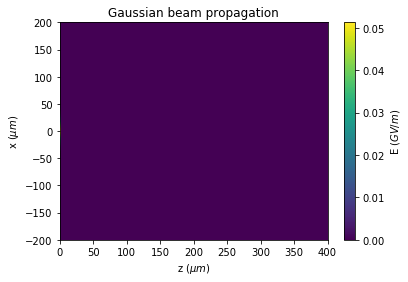

In [19]:
et = laser.pulse_time(e, z, t, 1420, c=0.3)
plt.imshow(np.flipud(np.transpose(abs(et[0,:,:]))), aspect='auto', extent=[0, Z, -X, X])
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($\mu m$)')
plt.ylabel(r'x ($\mu m$)')
plt.title('Gaussian beam propagation')
plt.show()

In [24]:
Ntime = 240
time = np.linspace(0, 1420, Ntime, False)
et = laser.pulse_time(e, z, t, time, c=0.3)

fig = plt.figure(figsize=(16, 9))

im = plt.imshow(np.flipud(np.transpose(abs(et[0,:,:]))), animated=True, extent=[0, Z, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($\mu m$)')
plt.ylabel(r'x ($\mu m$)')
plt.title('Gaussian beam propagation')
i = 1;

def updatefig(*args):
    global i
    print('Rendering frame ', i)
    im.set_array(np.flipud(np.transpose(abs(et[i,:,:]))))
    i += 1
    if i==Ntime:
        i=0
    return im,

ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Ntime)
ani.save(r'C:\Users\robert\Dropbox\Research\temp\Axicon.mp4', fps=30)

Rendering frame  1
Rendering frame  2
Rendering frame  3
Rendering frame  4
Rendering frame  5
Rendering frame  6
Rendering frame  7
Rendering frame  8
Rendering frame  9
Rendering frame  10
Rendering frame  11
Rendering frame  12
Rendering frame  13
Rendering frame  14
Rendering frame  15
Rendering frame  16
Rendering frame  17
Rendering frame  18
Rendering frame  19
Rendering frame  20
Rendering frame  21
Rendering frame  22
Rendering frame  23
Rendering frame  24
Rendering frame  25
Rendering frame  26
Rendering frame  27
Rendering frame  28
Rendering frame  29
Rendering frame  30
Rendering frame  31
Rendering frame  32
Rendering frame  33
Rendering frame  34
Rendering frame  35
Rendering frame  36
Rendering frame  37
Rendering frame  38
Rendering frame  39
Rendering frame  40
Rendering frame  41
Rendering frame  42
Rendering frame  43
Rendering frame  44
Rendering frame  45
Rendering frame  46
Rendering frame  47
Rendering frame  48
Rendering frame  49
Rendering frame  50
Rendering